<a href="https://colab.research.google.com/github/Digvijay1970/TCS-iON-RIO-125_Internship/blob/main/TCS_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

import altair as alt
import itertools
import keras
import math
import re
import string
import spacy
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')

from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/webmd.csv")
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [ ]:
df.shape

(362806, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [ ]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [ ]:
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [ ]:
pip install mimesis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 11.0 MB/s eta 0:00:00


### **Name and race column addition**

In [ ]:
from mimesis import Person
person = Person('en')
def fake_names(n):
    return [person.name() for _ in range(n)]
names = fake_names(362806)
data_name = pd.DataFrame(names, columns=['Name'])
data_name.head()

,Name
0,Yoshie
1,Harrison
2,Ezequiel
3,Rogelio
4,Brian


In [ ]:
options = ["White", "Hispanic", "Black", "Asian"]
probabilities = [0.32, 0.28, 0.22, 0.18]

# Generate synthetic data for the "Race" column
data_race = pd.DataFrame(np.random.choice(options, size=362806, p=probabilities), columns=['Race'])

# Display the first few rows of the DataFrame
data_race.head()


,Race
0,Hispanic
1,Hispanic
2,Black
3,White
4,White


In [ ]:
df1 = pd.concat([data_name, data_race, df], axis=1).reindex(df.index)
df1.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Yoshie,Hispanic,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Harrison,Hispanic,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Ezequiel,Black,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Rogelio,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Brian,White,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [ ]:
df2 = df1[df1.DrugId == 6873]

### **Data Preprocessing**

In [ ]:
# Missing Value Handling
df2.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          4
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [ ]:
df2.dropna(axis = 0, inplace = True)
df2.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [ ]:
# Handling instances with whitespaces
for i in df2:
    df2[i]=np.where(df2[i]==" ",np.NAN,df2[i])

df2.isna().sum()

Name                0
Race                0
Age               270
Condition           0
Date                0
Drug                0
DrugId              0
EaseofUse           0
Effectiveness       0
Reviews          1562
Satisfaction        0
Sex               494
Sides               0
UsefulCount         0
dtype: int64

In [ ]:
df2.dropna(axis=0, inplace = True)
df2.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [ ]:
# Handling instances with double whitespaces
for i in df2:
    df2[i]=np.where(df2[i]=="  ",np.NAN,df2[i])

df2.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

**Checking each column values**

## **Sex**

In [ ]:
df2.Sex.value_counts()

Female    4060
Male      2466
Name: Sex, dtype: int64

### **Age**

In [ ]:
df2.Age.value_counts()

55-64         1912
45-54         1760
65-74         1148
35-44          858
75 or over     490
25-34          306
19-24           44
13-18            6
0-2              2
Name: Age, dtype: int64

### **Date**

In [ ]:
df2['Year'] = pd.to_datetime(df2['Date'], errors='coerce').dt.year
df2['Month'] = pd.to_datetime(df2['Date'], errors='coerce').dt.month
df2['day_of_week'] = pd.to_datetime(df2['Date'], errors='coerce').dt.day_name()

In [ ]:
df2.head(5)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year,Month,day_of_week
9203,Brice,Asian,75 or over,High Blood Pressure,2/8/2020,lisinopril solution,6873.0,5.0,4.0,I have developed a very itch rash on my body f...,4.0,Female,"Dizziness , lightheadedness , tiredness, or ...",3.0,2020,2,Saturday
9209,Kacy,Black,55-64,High Blood Pressure,1/14/2020,lisinopril solution,6873.0,4.0,5.0,"tried alternative medicine Beet root, hibiscus...",4.0,Male,"Dizziness , lightheadedness , tiredness, or ...",3.0,2020,1,Tuesday
9215,Keesha,Hispanic,65-74,High Blood Pressure,10/17/2019,lisinopril solution,6873.0,5.0,5.0,Have been taking 10 mg doses per day for over ...,5.0,Male,"Dizziness , lightheadedness , tiredness, or ...",6.0,2019,10,Thursday
9221,Donetta,White,55-64,High Blood Pressure,10/13/2019,lisinopril solution,6873.0,2.0,4.0,I don't like that I'm taking this and not know...,2.0,Male,"Dizziness , lightheadedness , tiredness, or ...",12.0,2019,10,Sunday
9227,Shemika,Asian,55-64,High Blood Pressure,8/16/2019,lisinopril solution,6873.0,3.0,1.0,Was on this medicine for about 2 months and ha...,1.0,Female,"Dizziness , lightheadedness , tiredness, or ...",22.0,2019,8,Friday


### **Year, Month and Day of week column generated**

### **Useful Count**

5.09650737167029

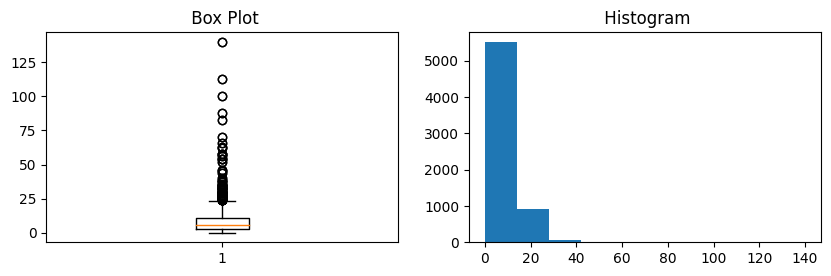

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(df2["UsefulCount"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(df2["UsefulCount"])
plt.title(" Histogram")
df2.UsefulCount.skew()

0.13539917023288633

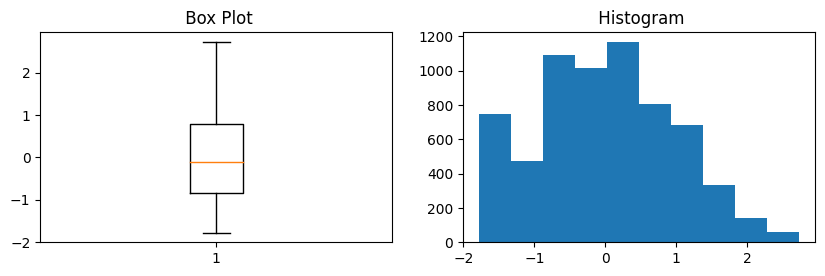

In [ ]:
data_Usefulcount = pd.DataFrame(df2['UsefulCount'])

scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data_Usefulcount1 = pipeline.fit_transform(data_Usefulcount)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_Usefulcount1)
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data_Usefulcount1)
plt.title(" Histogram")

df2['UsefulCount_boxcox'] = data_Usefulcount1
df2['UsefulCount_boxcox'].skew()

### **EaseofUse**

-1.0956719032464681

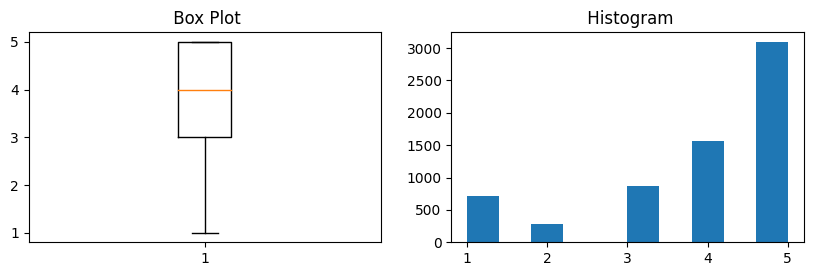

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(df2["EaseofUse"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(df2["EaseofUse"])
plt.title(" Histogram")
df2.EaseofUse.skew()

-0.4695297334699221

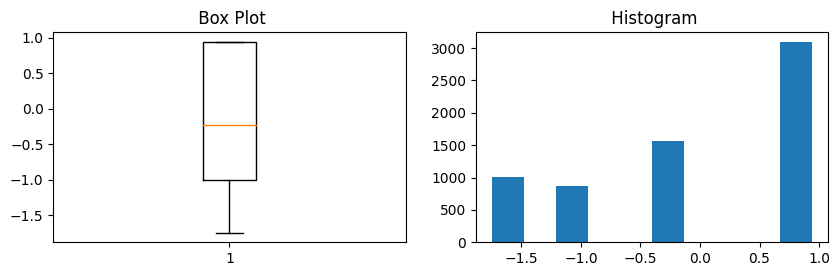

In [ ]:
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])

data_EaseofUse = pd.DataFrame(df2['EaseofUse'])
data_EaseofUse1 = pipeline.fit_transform(data_EaseofUse)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_EaseofUse1)
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data_EaseofUse1)
plt.title(" Histogram")

df2['EaseofUse_boxcox'] = data_EaseofUse1
df2.EaseofUse_boxcox.skew()

### **Satisfaction column**

0.46899147382396195

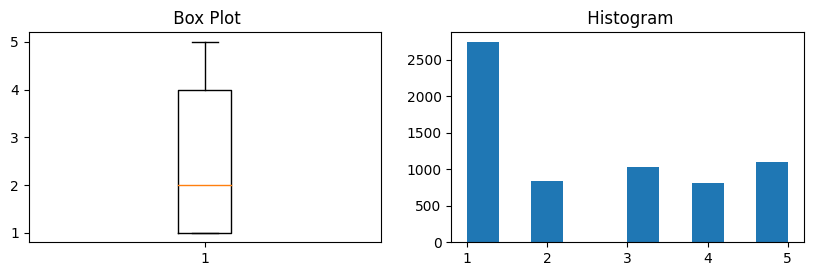

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(df2["Satisfaction"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(df2["Satisfaction"])
plt.title(" Histogram")
df2.Satisfaction.skew()

### **Effectiveness**

-0.35269982353771245

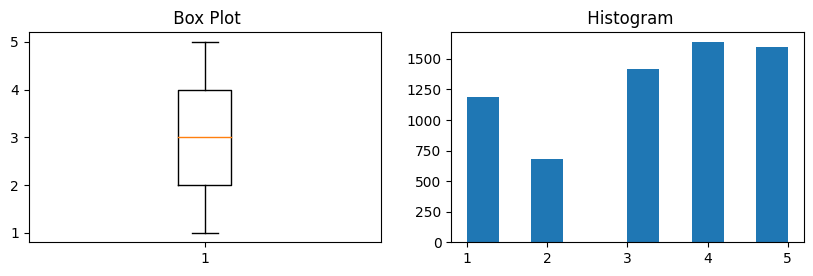

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(df2["Effectiveness"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(df2["Effectiveness"])
plt.title(" Histogram")
df2.Effectiveness.skew()

## **New Feature creation: Sideeffect**

In [ ]:
mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
df2['Sideeffect'] = df2['Satisfaction'].map(mapping)

In [ ]:
df2.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Year', 'Month', 'day_of_week', 'UsefulCount_boxcox',
       'EaseofUse_boxcox', 'Sideeffect'],
      dtype='object')

### **Exploratory Data Analysis**

### **Top 15 Drugs based on No. of Users**

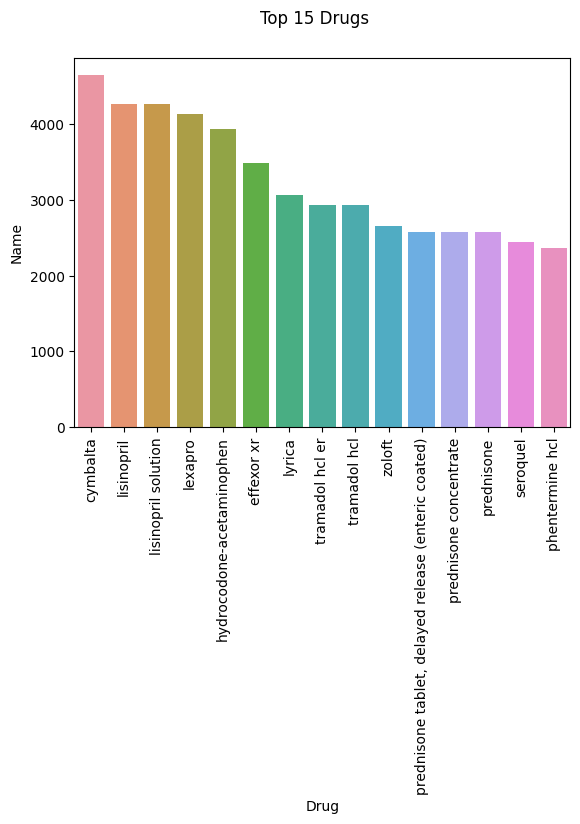

In [ ]:
df_= df['Drug'].value_counts().head(15).reset_index()
df_.columns = ['Drug', 'Name']
sns.barplot(data=df_, x = 'Drug', y = 'Name')
plt.suptitle("Top 15 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

Cymbalta tops the list followed by Lisinopril. It is to be noted that all the 20 drugs has been used by more than atleast 2000 people

### **EDA on Licinopril**

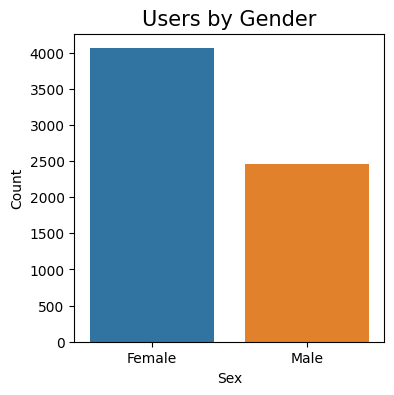

In [ ]:
# Which gender is the predominant user?
plt.figure(figsize=(4, 4))
sns.countplot(x='Sex', data=df2)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Female users are predominant

Text(0, 0.5, 'Count')

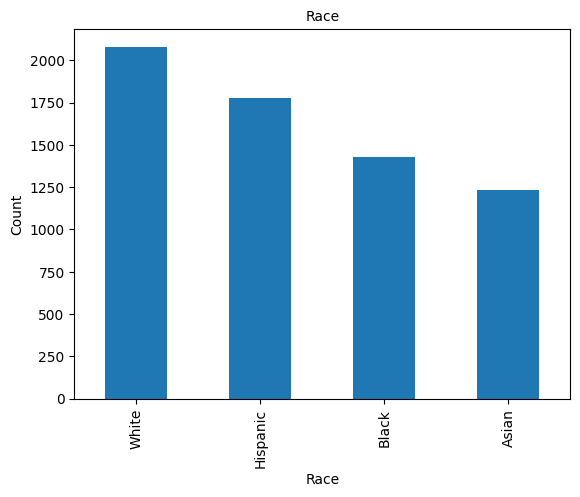

In [ ]:
# Which race is the predominant user?
df2['Race'].value_counts().plot(kind='bar')
plt.title("Race", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

Text(0.5, 1.0, 'Users by Race and Gender')

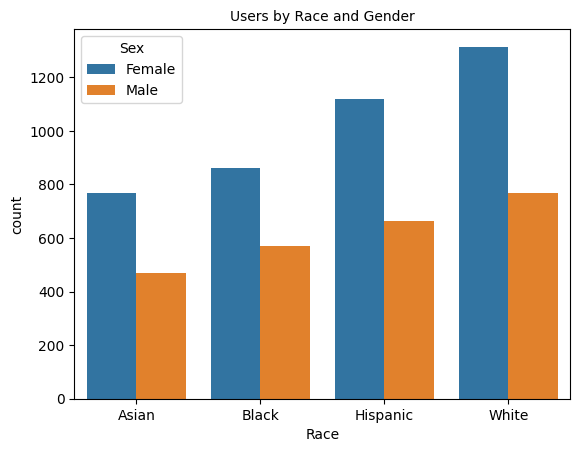

In [ ]:
# In each race, which gender is the predominant user?
sns.countplot(x='Race',hue='Sex',data=df2)
plt.title("Users by Race and Gender", fontsize = 10)

Text(0.5, 1.0, 'Users by Age and Gender')

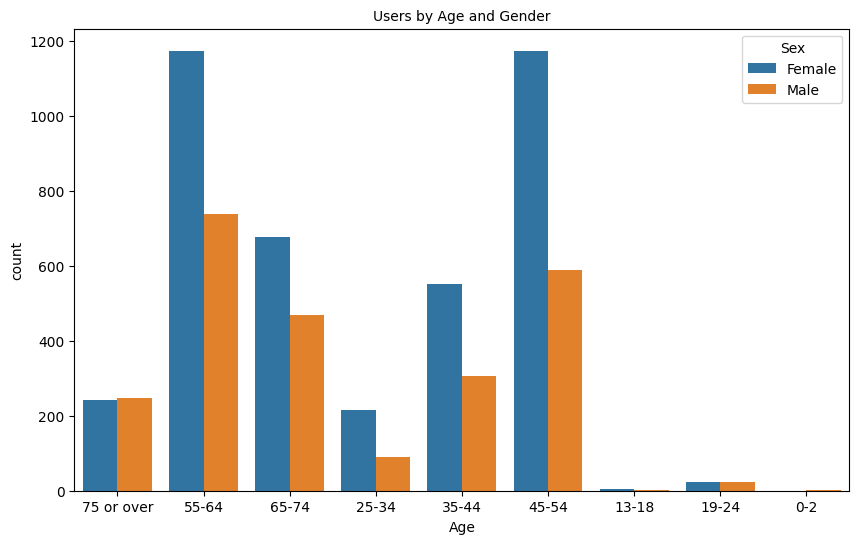

In [ ]:
# In each age group, which gender is the predominant user?
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=df2)
plt.title("Users by Age and Gender", fontsize = 10)

Text(0, 0.5, 'Count of Reviews')

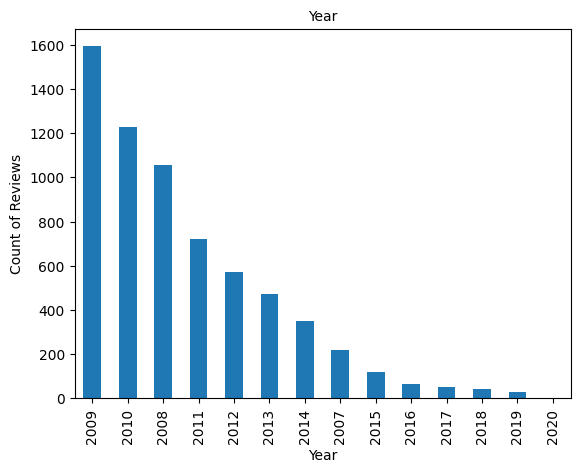

In [ ]:
# In each year, how many reviews were collected?
df2['Year'].value_counts().plot(kind='bar')
plt.title("Year", fontsize = 10)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Count of Reviews", fontsize = 10)

In each year, there is a gradual decrease in user reviews

Text(0, 0.5, 'Count')

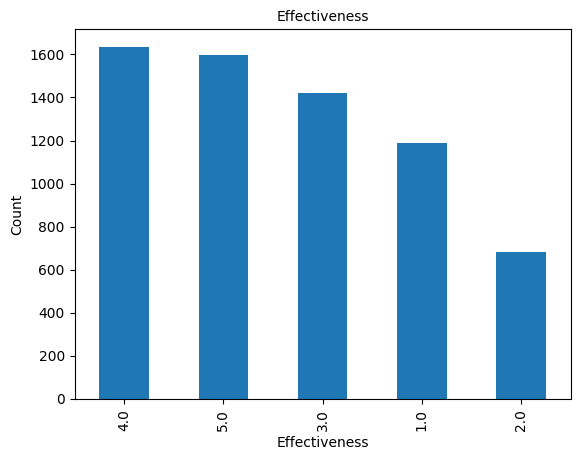

In [ ]:
#how effective is the drug?
df2['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

The drug is fairly effective with around 1600 users voting a 4 rating to it.

<Figure size 1000x800 with 0 Axes>

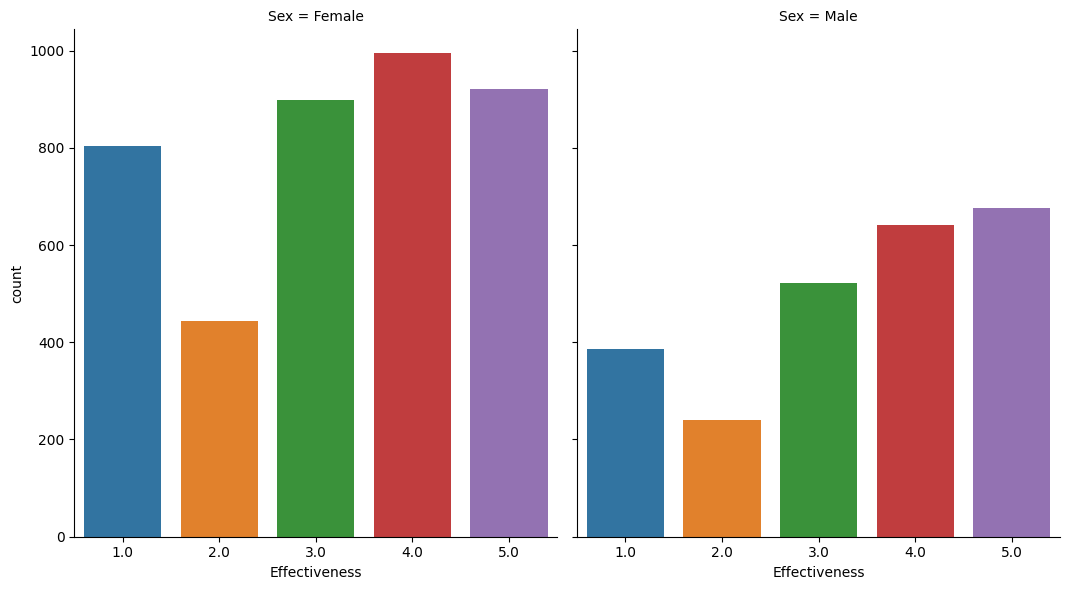

In [ ]:
#How effective is the drug among both the gender category?
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=df2, kind="count",
                height=6,aspect =.9);

Both the users have given a mixed response

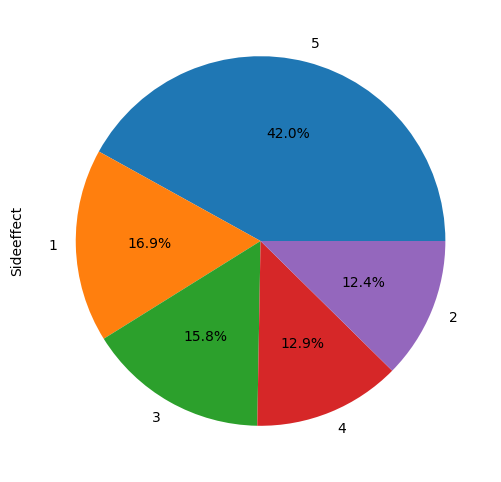

In [ ]:
#How many reported side effects for the drug?
plt.figure(figsize=(6,6))
df2['Sideeffect'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

**42% users reported extreme sideeffects with 1 being no side effect and 5 being extreme side effect**

<Axes: xlabel='Age', ylabel='count'>

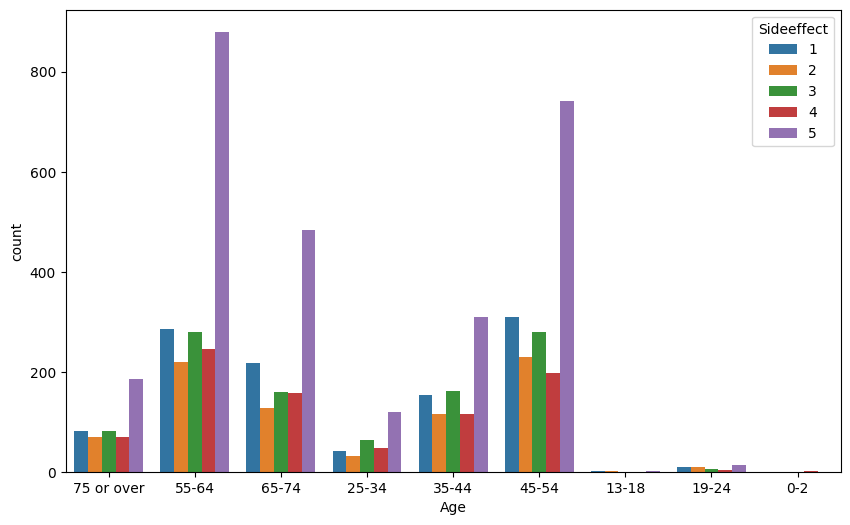

In [ ]:
#Which age group has reported most side effect?
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sideeffect',data=df2)

55-64 age group has opinionated that they had extreme side effects

<Figure size 2000x1000 with 0 Axes>

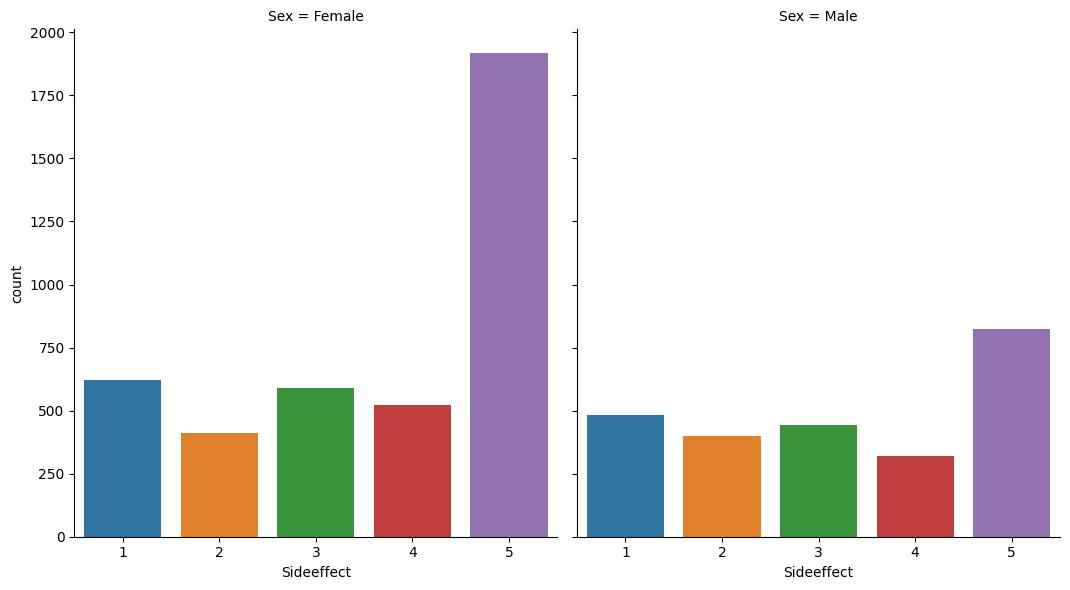

In [ ]:
#Among both the gender category, how is the sideeffects of the drug?
plt.figure(figsize=(20,10))

g = sns.catplot(x="Sideeffect",col="Sex",data=df2, kind="count",height=6,aspect =.9);

Female users have reported more extreme side effects

### **Reviews**

In [ ]:
#Let us look at a sample of Review
df2.Reviews.sample(5)

15834    Had minor dry cough twice so far, lost 4 pound...
17032                                             sweating
15152    I HAVE BEEN ON THIS DRUG FOR A LITTLE OVER A M...
18930    can lisinopril cause headaches if taken in hig...
15300    I have musle aches  could it be because of thi...
Name: Reviews, dtype: object

 **Let us define a function to clean the text in the review so as to generate meaningfull output. The plan is to rank the reviews as either positive or negative. But, so as to rank the reviews, we need a more samples than what we have here. So, we will train the algoithm on the complete parent dataset (containing data about all the medicines). The algorithm will get trained on satisfaction and reviews, which means, it will identify which reviews or specifically word consitutes positive review ( satisfaction > 3) and which one consitute negative reviews (satisfaction < 3). Then, the generated model will be used to generate review rank ( 1 for positve and 0 for negative) for us in our dataset. Kindly note, the review rank for entries where satisfaction > 3 is 1 and for satisfaction < 3 is 0. The entries with satisfaction == 3 will be fed to the model to generate review rank values. Finally, our dataset will be complete after this**

### **Cleaning the Global Review column**

In [ ]:
if df['Reviews'].dtype.kind == "O":
        df['Reviews'] = df['Reviews'].str.strip()

In [ ]:
df['Reviews']= df['Reviews'].astype(str)

In [ ]:
%%time

nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])
STOPWORDS = set(sklearn_stop_words).union(set(stopwords.words("english")))

def clean_review(text, STOPWORDS=STOPWORDS, nlp=nlp):
    """Cleans up text"""

    def rep_emo(text, placeholder_pos=' happyemoticon ', placeholder_neg=' sademoticon '):
        """Replace emoticons"""
        # Credit https://github.com/shaheen-syed/Twitter-Sentiment-Analysis/blob/master/helper_functions.py
        emoticons_pos = [":)", ":-)", ":p", ":-p", ":P", ":-P", ":D",":-D", ":]", ":-]", ";)", ";-)",
                         ";p", ";-p", ";P", ";-P", ";D", ";-D", ";]", ";-]", "=)", "=-)", "<3"]
        emoticons_neg = [":o", ":-o", ":O", ":-O", ":(", ":-(", ":c", ":-c", ":C", ":-C", ":[", ":-[",
                         ":/", ":-/", ":\\", ":-\\", ":n", ":-n", ":u", ":-u", "=(", "=-(", ":$", ":-$"]

        for e in emoticons_pos:
            text = text.replace(e, placeholder_pos)

        for e in emoticons_neg:
            text = text.replace(e, placeholder_neg)
        return text

    def rep_punct(text):
        """Replace all punctuation with space"""
        for c in string.punctuation:
            text = text.replace(c, " ")
        return text

    def rem_stop_num(text):
        """Remove stop words and anything starting with number"""
        return " ".join(word for word in text.split() if word not in STOPWORDS and not word[0].isdigit())

    def lemmatize(text):
        """Return lemmas of tokens in text"""
        return " ".join(tok.lemma_.lower().strip() for tok in nlp(text) if tok.lemma_ != "-PRON-")

    return lemmatize(rem_stop_num(rep_punct(rep_emo(text))))

mldf = df[["Satisfaction", "Reviews"]]
mldf["Reviews"] = mldf["Reviews"].apply(clean_review)

# remove any rows with new empty strings following the clean-up
mldf["Reviews"].replace("", np.nan, inplace=True)
mldf.dropna(inplace=True)
# adding indexes as "index" column for later use to recreate same splits
mldf.reset_index(inplace=True)

CPU times: user 31min 48s, sys: 6.05 s, total: 31min 54s
Wall time: 32min 27s


**Review column is cleaned. A new column satisfaction1 is generated which will help in identifiying postive and negative reviews for algorithm where 0 is negative, 2 is positive and 1 is neutral for satisfaction < 3, > 3 and ==3 respectively. We will omit the neutral reviews.¶**

In [ ]:
def relabel(x):
    return 0 if x < 3 else 1 if x == 3 else 2

mldf["Satisfaction1"] = mldf["Satisfaction"].apply(relabel)

**Generating Text processing Model**

In [ ]:
train_set, test_set = train_test_split(mldf, test_size=0.25, random_state=0, stratify=mldf["Satisfaction1"])
train_index = train_set.index
test_index = test_set.index
print(train_set.shape)
print(test_set.shape)
(240564, 4)

(240564, 4)
(80189, 4)


(240564, 4)

In [ ]:
%%time
train_set = train_set[train_set["Satisfaction1"] != 1]
test_set = test_set[test_set["Satisfaction1"] != 1]
print(train_set.shape)
print(test_set.shape)

vectorizer = TfidfVectorizer(max_features=2500, min_df=10, max_df=0.8)
X_train = vectorizer.fit_transform(train_set["Reviews"]).toarray()
X_test = vectorizer.transform(test_set["Reviews"]).toarray()
y_train = train_set["Satisfaction1"].values
y_test = test_set["Satisfaction1"].values

model = RandomForestClassifier(min_samples_split=6, random_state=0)
model.fit(X_train, y_train)

acc_train = accuracy_score(y_train, model.predict(X_train))
print(f"\nAccuracy in train set: {acc_train:.2}")
predictions = model.predict(X_test)
acc_test = accuracy_score(y_test, predictions)
print(f"\nAccuracy in test  set: {acc_test:.2}\n")
print(classification_report(y_test, predictions))

(207859, 4)
(69287, 4)

Accuracy in train set: 0.99

Accuracy in test  set: 0.83

              precision    recall  f1-score   support

           0       0.83      0.80      0.82     32110
           2       0.83      0.86      0.85     37177

    accuracy                           0.83     69287
   macro avg       0.83      0.83      0.83     69287
weighted avg       0.83      0.83      0.83     69287

CPU times: user 26min 14s, sys: 20.1 s, total: 26min 34s
Wall time: 26min 57s


In [ ]:
# Let us the clean the review specific to our drug
df2["Reviews"] = df2["Reviews"].apply(clean_review)

In [ ]:
# Let us the rank the reviews by creating a function for the same

def predict_rank(text):
    cleaned_text = [clean_review(text)]
    padded_text = vectorizer.transform(cleaned_text)
    p = model.predict(padded_text)[0]
    if (p == 0):
        return 0
    else :
        return 1

def predict_rank1(rank):
    if (rank < 3):
        return 0
    else:
        return 1

# predict_rank("I loved it")
df2['Reviews_Rank'] = df['Satisfaction']
df2.loc[df2['Satisfaction'] < 3, 'Reviews_Rank'] = df2.loc[df['Satisfaction'] < 3, 'Reviews_Rank'].apply(predict_rank1)
df2.loc[df2['Satisfaction'] > 3, 'Reviews_Rank'] = df2.loc[df['Satisfaction'] > 3, 'Reviews_Rank'].apply(predict_rank1)
df2.loc[df2['Satisfaction'] == 3, 'Reviews_Rank'] = df2.loc[df['Satisfaction'] == 3, 'Reviews'].apply(predict_rank)
df2['Reviews_Rank'].unique()

array([1, 0])

Columns Name has unique values so will be dropped. Drug, DrugId, Condition, Date, Easeofuse, usefulcount, sides, Year will be dropped. Race, Sex, Year, Month, Dayofweek will be onehot encoded. Satisfaction will be segregated based on the values as nil, mild, moderate, sever, extreme based on values of 5, 4, 3, 2, 1 respectively. The assumption being that thet satisfaction is a parameter that gets affected by side effects in case of patients.

In [ ]:
df2.drop(['Name','Condition','Date','Drug','DrugId','EaseofUse','Sides','UsefulCount'], axis=1, inplace = True)

In [ ]:
df2.Month = df2.Month.astype(str)
df2.Year = df2.Year.astype(str)
data_encod = df2[['Race', 'Age','Sex','Month','day_of_week']]
data_num = df2[['Effectiveness']]
df2.columns

Index(['Race', 'Age', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex',
       'Year', 'Month', 'day_of_week', 'UsefulCount_boxcox',
       'EaseofUse_boxcox', 'Sideeffect', 'Reviews_Rank'],
      dtype='object')

In [ ]:
 # Encoding : One Hot Encoding

 data_encod = pd.get_dummies(data_encod)
data_encod

,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_0-2,Age_13-18,Age_19-24,Age_25-34,Age_35-44,Age_45-54,...,Month_7,Month_8,Month_9,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
9203,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9209,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9215,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9227,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18981,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
18982,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
18984,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
18985,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Scaling : Standard Scaling

from sklearn.preprocessing import StandardScaler
mm = StandardScaler()
data_num = mm.fit_transform(data_num)
data_num = pd.DataFrame(data_num, columns = ['Effectiveness'])
data_num

,Effectiveness
0,0.517259
1,1.226128
2,1.226128
3,0.517259
4,-1.609348
...,...
6521,-1.609348
6522,-1.609348
6523,1.226128
6524,-1.609348


In [ ]:
df3 = data_encod
df3['Effectiveness'] = data_num.values
df3

,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_0-2,Age_13-18,Age_19-24,Age_25-34,Age_35-44,Age_45-54,...,Month_8,Month_9,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Effectiveness
9203,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.517259
9209,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.226128
9215,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.226128
9221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.517259
9227,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,-1.609348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18981,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,-1.609348
18982,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,-1.609348
18984,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1.226128
18985,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,-1.609348


So finally what I suppose is the following features which are race, age, review rank and effectiveness can form the dataset which will predict the sideeffect of the user.

In [ ]:
df3 = data_encod
df3['Effectiveness'] = data_num.values
df3['Reviews_Rank'] = df2.Reviews_Rank
df3['UsefulCount_boxcox'] = data_Usefulcount1
df3['EaseofUse_boxcox'] = data_EaseofUse1
df3

,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_0-2,Age_13-18,Age_19-24,Age_25-34,Age_35-44,Age_45-54,...,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Effectiveness,Reviews_Rank,UsefulCount_boxcox,EaseofUse_boxcox
9203,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.517259,1,-0.835439,0.943255
9209,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1.226128,1,-0.835439,-0.231105
9215,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1.226128,1,-0.102133,0.943255
9221,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0.517259,0,0.918562,-1.480793
9227,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1.609348,0,1.837785,-1.004962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18981,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,-1.609348,0,1.551731,-1.480793
18982,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,-1.609348,0,0.918562,0.943255
18984,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1.226128,1,-0.835439,0.943255
18985,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,-1.609348,0,0.631664,-1.746405


In [ ]:
df4 = pd.DataFrame(df2['Sideeffect'])
df4

,Sideeffect
9203,2
9209,2
9215,1
9221,4
9227,5
...,...
18981,5
18982,5
18984,2
18985,5


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df3,df4,test_size=0.25, random_state = 42, stratify=df4)

### **Log Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
# solver='lbfgs',max_iter=10000
model1 = log_reg.fit(X_train,Y_train)
Y_pred_logreg = model1.predict(X_test)

#metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
print(confusion_matrix(Y_test,Y_pred_logreg))
print(accuracy_score(Y_test,Y_pred_logreg))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred_logreg)
print(report)

[[242  33   1   0   0]
 [ 49 133  20   0   0]
 [ 19  44  81  16  99]
 [  0   0  26  15 169]
 [  0   0  23  32 630]]
0.6746323529411765
              precision    recall  f1-score   support

           1       0.78      0.88      0.83       276
           2       0.63      0.66      0.65       202
           3       0.54      0.31      0.40       259
           4       0.24      0.07      0.11       210
           5       0.70      0.92      0.80       685

    accuracy                           0.67      1632
   macro avg       0.58      0.57      0.55      1632
weighted avg       0.62      0.67      0.63      1632



### **SVM Polynomial**

In [ ]:
from sklearn.svm import SVC
svm_clf_p = SVC(kernel='poly', degree = 4, probability=True)
svm_model = svm_clf_p.fit(X_train, Y_train)
y_pred_svmp = svm_clf_p.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_svmp))
print(accuracy_score(Y_test, y_pred_svmp))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_svmp)
print(report)

[[235  36   5   0   0]
 [ 33 148  21   0   0]
 [ 15  23 125  14  82]
 [  0   0  12  55 143]
 [  0   0  10   7 668]]
0.7542892156862745
              precision    recall  f1-score   support

           1       0.83      0.85      0.84       276
           2       0.71      0.73      0.72       202
           3       0.72      0.48      0.58       259
           4       0.72      0.26      0.38       210
           5       0.75      0.98      0.85       685

    accuracy                           0.75      1632
   macro avg       0.75      0.66      0.67      1632
weighted avg       0.75      0.75      0.73      1632



### **SVM RBF**

In [ ]:
from sklearn.svm import SVC
svm_clf_r = SVC(kernel='rbf', degree = 4, probability=True)
svm_model = svm_clf_r.fit(X_train, Y_train)
y_pred_svmr = svm_clf_r.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_svmr))
print(accuracy_score(Y_test, y_pred_svmr))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_svmr)
print(report)

[[235  38   3   0   0]
 [ 34 158  10   0   0]
 [ 17  40 100  15  87]
 [  0   0  23  32 155]
 [  0   0  12   9 664]]
0.7285539215686274
              precision    recall  f1-score   support

           1       0.82      0.85      0.84       276
           2       0.67      0.78      0.72       202
           3       0.68      0.39      0.49       259
           4       0.57      0.15      0.24       210
           5       0.73      0.97      0.83       685

    accuracy                           0.73      1632
   macro avg       0.69      0.63      0.62      1632
weighted avg       0.71      0.73      0.69      1632



### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtm_clf = DecisionTreeClassifier(random_state = 42)
dtm_clf.fit(X_train, Y_train)
y_pred_dtm = dtm_clf.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_dtm))
print(accuracy_score(Y_test, y_pred_dtm))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_dtm)
print(report)

[[242  27   7   0   0]
 [ 18 160  24   0   0]
 [  8  15 189  20  27]
 [  0   0  17 143  50]
 [  0   0  37  64 584]]
0.8075980392156863
              precision    recall  f1-score   support

           1       0.90      0.88      0.89       276
           2       0.79      0.79      0.79       202
           3       0.69      0.73      0.71       259
           4       0.63      0.68      0.65       210
           5       0.88      0.85      0.87       685

    accuracy                           0.81      1632
   macro avg       0.78      0.79      0.78      1632
weighted avg       0.81      0.81      0.81      1632



### **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfm_clf = RandomForestClassifier(random_state = 42)
rfm_clf.fit(X_train, Y_train)
y_pred_rfm = rfm_clf.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_rfm))
print(accuracy_score(Y_test, y_pred_rfm))


#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_rfm)
print(report)

[[254  17   5   0   0]
 [ 29 163  10   0   0]
 [ 11  22 175  18  33]
 [  0   0   9 134  67]
 [  0   0  16  13 656]]
0.8468137254901961
              precision    recall  f1-score   support

           1       0.86      0.92      0.89       276
           2       0.81      0.81      0.81       202
           3       0.81      0.68      0.74       259
           4       0.81      0.64      0.71       210
           5       0.87      0.96      0.91       685

    accuracy                           0.85      1632
   macro avg       0.83      0.80      0.81      1632
weighted avg       0.84      0.85      0.84      1632



### HyperTuning Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [1, 10, 100], 'criterion': ['gini', 'entropy'], 'min_samples_leaf' : list(range(25, 100)), 'min_samples_split': [2, 3, 4], 'max_features': ['auto','log2']}
rfc_tuned = RandomForestClassifier()
model_tuning_RF = GridSearchCV(rfc_tuned, param_grid=params, verbose=1, cv=3, scoring = 'recall')
grid_rf_metrics = model_tuning_RF.fit(X_train, Y_train)

Fitting 3 folds for each of 2700 candidates, totalling 8100 fits


In [ ]:
print("Best: %f using %s" % (grid_rf_metrics.best_score_, grid_rf_metrics.best_params_))

Best: nan using {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 25, 'min_samples_split': 2, 'n_estimators': 1}


In [ ]:
y_pred_rfm = model_tuning_RF.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_rfm))
print(accuracy_score(Y_test, y_pred_rfm))


#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_rfm)
print(report)

[[236  39   1   0   0]
 [ 45 135  22   0   0]
 [ 14  60  47  30 108]
 [  0   0  11  48 151]
 [  0   0   6  77 602]]
0.6544117647058824
              precision    recall  f1-score   support

           1       0.80      0.86      0.83       276
           2       0.58      0.67      0.62       202
           3       0.54      0.18      0.27       259
           4       0.31      0.23      0.26       210
           5       0.70      0.88      0.78       685

    accuracy                           0.65      1632
   macro avg       0.59      0.56      0.55      1632
weighted avg       0.63      0.65      0.62      1632



### **Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier()
bag_clf.fit(X_train, Y_train)
y_pred_bag = bag_clf.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_bag))
print(accuracy_score(Y_test, y_pred_bag))


#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_bag)
print(report)

[[259  15   2   0   0]
 [ 25 161  16   0   0]
 [ 12  19 182  20  26]
 [  0   0  27 144  39]
 [  0   0  34  38 613]]
0.8327205882352942
              precision    recall  f1-score   support

           1       0.88      0.94      0.91       276
           2       0.83      0.80      0.81       202
           3       0.70      0.70      0.70       259
           4       0.71      0.69      0.70       210
           5       0.90      0.89      0.90       685

    accuracy                           0.83      1632
   macro avg       0.80      0.80      0.80      1632
weighted avg       0.83      0.83      0.83      1632



Analysis Result:

Accuracy Values of each algorithm:

Logarithmic Regression: 67%

SVM Polynomial: 75%

SVM RBF: 71%

Decision Tree: 82%

Bagging Classifier : 83%

Random Forest Classifier gave an accuracy of 85%. Hence, this model is selected